# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge - Heart Attack EDA and Prediction
### Oleh Anggoro Maliky

# Problem Definition
## Latar Belakang
Serangan jantung adalah salah satu penyakit yang mematikan dan sering kali tidak terduga. Ini merupakan kondisi medis yang memerlukan perhatian segera dan diagnosis yang akurat. Dengan kemajuan dalam bidang Data Science dan keberadaan data medis yang tersedia, kita memiliki kesempatan untuk melakukan analisis yang lebih mendalam terhadap faktor-faktor yang mempengaruhi serangan jantung serta membangun model prediktif untuk mengidentifikasi risiko serangan jantung pada individu.
## Tujuan Penelitian
Exploratory Data Analysis (EDA): Melakukan analisis data untuk memahami pola, tren, dan korelasi antara berbagai faktor seperti usia, jenis kelamin, tekanan darah, kolesterol, detak jantung maksimum, dan lain-lain terhadap kemungkinan terjadinya serangan jantung.
Pengembangan Model Prediktif: Membangun model machine learning yang dapat memprediksi risiko serangan jantung pada individu berdasarkan faktor-faktor yang diidentifikasi selama EDA.
Validasi Model: Melakukan validasi model untuk memastikan keakuratannya dalam memprediksi risiko serangan jantung.
## Rumusan Masalah
1. Bisakah kita mengidentifikasi pola atau tren tertentu dari data yang dapat digunakan untuk memprediksi risiko serangan jantung?
2. Apa jenis model machine learning yang paling cocok untuk memprediksi risiko serangan jantung berdasarkan data yang tersedia?
3. Seberapa akurat model yang dikembangkan dalam memprediksi risiko serangan jantung?.

## Data yang akan dipakai
Heart Disease Dataset by DAVID LAPP https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

Deskripsi:

Kumpulan data ini berasal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hongaria, Swiss, dan Long Beach V. Kumpulan data ini berisi 76 atribut, termasuk atribut yang diprediksi, tetapi semua eksperimen yang dipublikasikan mengacu pada penggunaan subset dari 14 atribut tersebut. Bidang "target" mengacu pada adanya penyakit jantung pada pasien. Bernilai bilangan bulat 0 = tidak ada penyakit dan 1 = sakit.

Keterangan:

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

Target - Target variable

## Metode
(tulis di sini)

# Preparation | Persiapan
## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Get Data | Mendapatkan Data

In [3]:
path_datasheet = "/heart.csv"
df = pd.read_csv(path_datasheet)

## Explore Data (EDA) | Eksplorasi Data

In [156]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1. Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trtbps    1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalachh  1025 non-null   int64  
 8   exng      1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slp       1025 non-null   int64  
 11  caa       1025 non-null   int64  
 12  thall     1025 non-null   int64  
 13  output    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


2. Deskripsi Data

In [155]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


3. Jumlah Penderita Heart Disease

Text(0, 0.5, 'Jumlah')

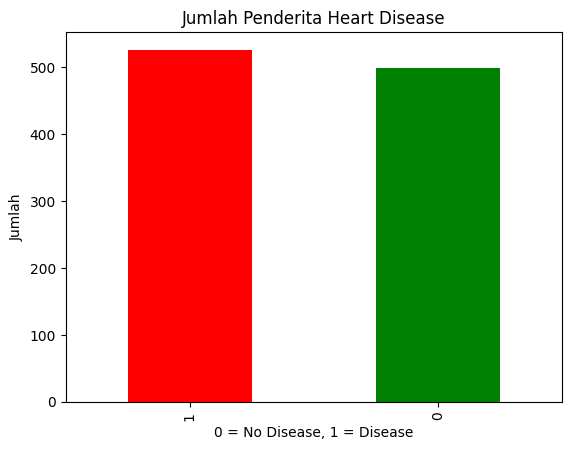

In [46]:
df["output"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Jumlah Penderita Heart Disease")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Jumlah")

4. Gender Penderita Heart Disease

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

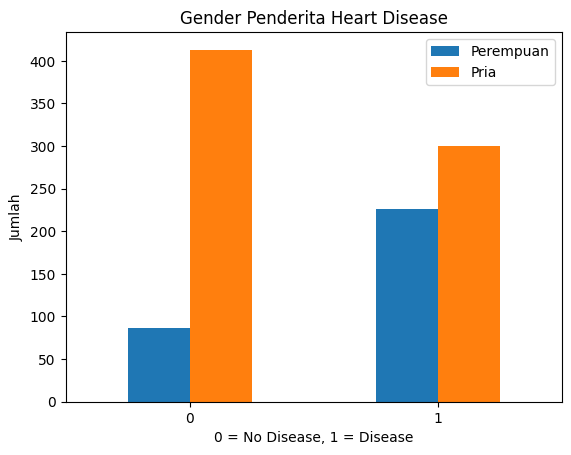

In [44]:
pd.crosstab(df.output, df.sex)
pd.crosstab(df.output, df.sex).plot(kind="bar")
plt.title("Gender Penderita Heart Disease")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Jumlah")
plt.legend(["Perempuan", "Pria"])
plt.xticks(rotation = 0)

5. Klasifikasi Data Numerik dan Kategorikal

In [28]:
df.columns
categorical_values = []
numerical_values = []

for column in df.columns:
    if df[column].nunique() <10:
        categorical_values.append(column)
    else:
        numerical_values.append(column)
print("categorical_values = ", categorical_values)
print("numerical_values = ", numerical_values)

categorical_values =  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
numerical_values =  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


6. Distribusi Numerik Penderita Heart Disease

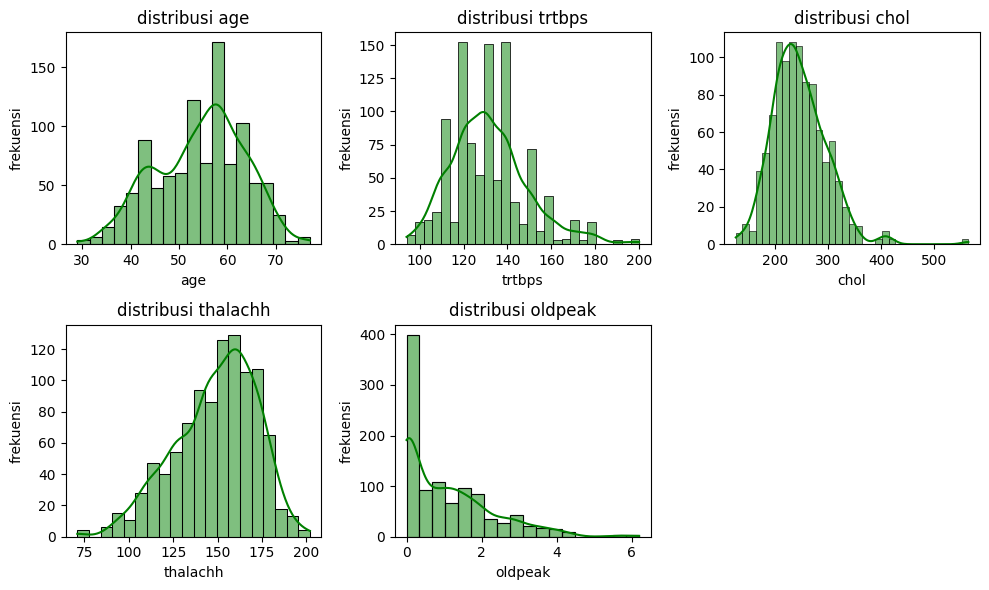

In [163]:
plt.figure(figsize=(10, 6))
num_features = ["age", "trtbps", "chol","thalachh", "oldpeak"]
for i, column in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], color="green", kde=True,)
    plt.title(f"distribusi {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("frekuensi")
plt.tight_layout()
plt.show()

7. Distribusi Kategorikal Penderita Heart Disease

In [38]:
for column in categorical_values:
    value_counts = df[column].value_counts()
    print(f"Values and Counts for {column}:\n{value_counts}\n{"-"*50}\n")

Values and Counts for sex:
sex
1    713
0    312
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for cp:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for fbs:
fbs
0    872
1    153
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for restecg:
restecg
1    513
0    497
2     15
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for exng:
exng
0    680
1    345
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for slp:
slp
1    482
2    469
0     74
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for caa:
caa
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
--------------------------------------------------

Values and Counts for thall:
thall
2    

# ML Modelling

1. Splitting

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (512, 13)
The shape of X_test is        (513, 13)
The shape of y_train is       (512,)
The shape of y_test is        (513,)


2. Decision Tree Algorithm


In [148]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_predicted)
print("\n")
print("Akurasi DecisionTreeClassifier:", accuracy_dt*100, "\n")
print(classification_report(y_test,dt_predicted))



Akurasi DecisionTreeClassifier: 95.12670565302143 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       256
           1       0.93      0.98      0.95       257

    accuracy                           0.95       513
   macro avg       0.95      0.95      0.95       513
weighted avg       0.95      0.95      0.95       513



3. Logistic Regression Algorithm

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_predict)
print("\n")
print("Akurasi Logistic Regression:",accuracy_lr*100,"\n")
print(classification_report(y_test,lr_predict))



Akurasi Logistic Regression: 84.60038986354775 

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       256
           1       0.79      0.94      0.86       257

    accuracy                           0.85       513
   macro avg       0.86      0.85      0.84       513
weighted avg       0.86      0.85      0.84       513



4. Random Forest Algorithm

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy of Random Forest:",accuracy_rf*100,"\n")
print(classification_report(y_test,y_pred))



Accuracy of Random Forest: 95.71150097465888 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       256
           1       0.94      0.98      0.96       257

    accuracy                           0.96       513
   macro avg       0.96      0.96      0.96       513
weighted avg       0.96      0.96      0.96       513



5. Support Vector Machine

In [128]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, svc_predicted)
print("\n")
print("Akurasi of Support Vector Classifier:", accuracy_svc*100, "\n")
print(classification_report(y_test,svc_predicted))




Akurasi of Support Vector Classifier: 83.62573099415205 

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       256
           1       0.78      0.94      0.85       257

    accuracy                           0.84       513
   macro avg       0.85      0.84      0.83       513
weighted avg       0.85      0.84      0.83       513



# Model Evaluation | Evaluasi Model

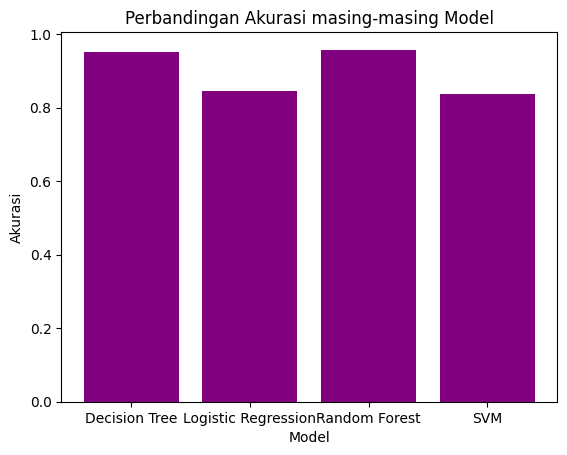

Akurasi Model Decision Tree adalah : 0.9512670565302144
Akurasi Model Logistic Regression adalah : 0.8460038986354775
Akurasi Model Random Forest adalah : 0.9571150097465887
Akurasi Model SVM adalah : 0.8362573099415205


In [154]:
models = ["Decision Tree","Logistic Regression", "Random Forest", "SVM",]
accuracies = [accuracy_dt, accuracy_lr, accuracy_rf, accuracy_svc]
plt.bar(models, accuracies, color="purple")
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi masing-masing Model")
plt.show()
for model, accuracy in zip(models, accuracies):
    print("Akurasi Model "f"{model} adalah : {accuracy}")

## Conclusion | Kesimpulan

Bisakah kita mengidentifikasi pola atau tren tertentu dari data yang dapat digunakan untuk memprediksi risiko serangan jantung?
Apa jenis model machine learning yang paling cocok untuk memprediksi risiko serangan jantung berdasarkan data yang tersedia?
Seberapa akurat model yang dikembangkan dalam memprediksi risiko serangan jantung?.
1. Dari data yang digunakan ini, kita dapat melakukan identifikasi pola atau tren tertentu untuk memprediksi resiko serangan jantung yaitu dengan memanfaatkan machine learning dengan beberapa algoritmanya seperti decission tree, random forest, logistic regresion, dan support vector machine.
2. Dari percobaan ini didapatkan bahwa model algoritma random forest memiliki akurasi terbesar yaitu sebesar 95.71150097465887 diikuti oleh model algortima Decision Tree dengan akurasi sebesar 0.9512670565302144.
3. Dari percobaan ini didapatkan bahwa model algoritma yang digunakan memiliki akurasi sebagai berikut:
  *   Akurasi Model Decision Tree adalah : 0.9512670565302144
  *   Akurasi Model Logistic Regression adalah : 0.8460038986354775
  *   Akurasi Model Random Forest adalah : 0.9571150097465887
  *   Akurasi Model SVM adalah : 0.8362573099415205



